In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('dataset/diabetes_binary_health_indicators_BRFSS2021.csv')

# Assuming df is your DataFrame and "Diabetes_binary" is your target column
class_0 = df[df.Diabetes_binary == 0]
class_1 = df[df.Diabetes_binary == 1]

# Downsample class 0 to match the number of instances in class 1
class_0_downsampled = class_0.sample(len(class_1))

# Concatenate the downsampled class 0 with class 1
balanced_df = pd.concat([class_0_downsampled, class_1], axis=0)

# Now, balanced_df is your balanced DataFrame

X = balanced_df.drop("Diabetes_binary", axis=1)
y = balanced_df["Diabetes_binary"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


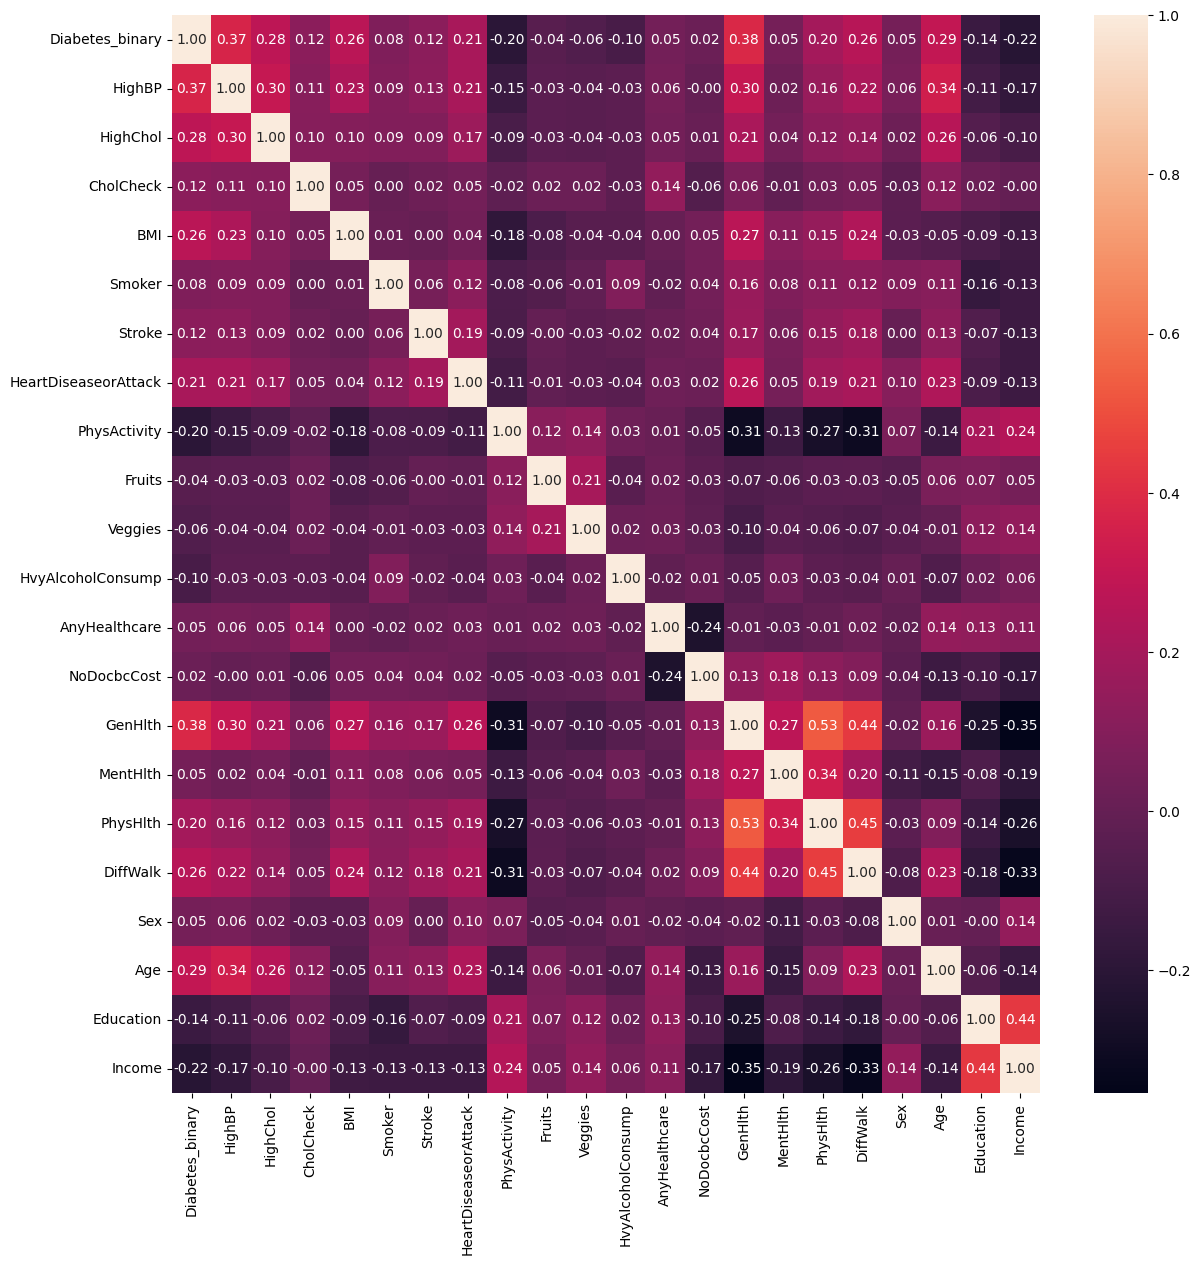

In [46]:
corr = balanced_df.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

C:\Users\ensar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.737116473041406


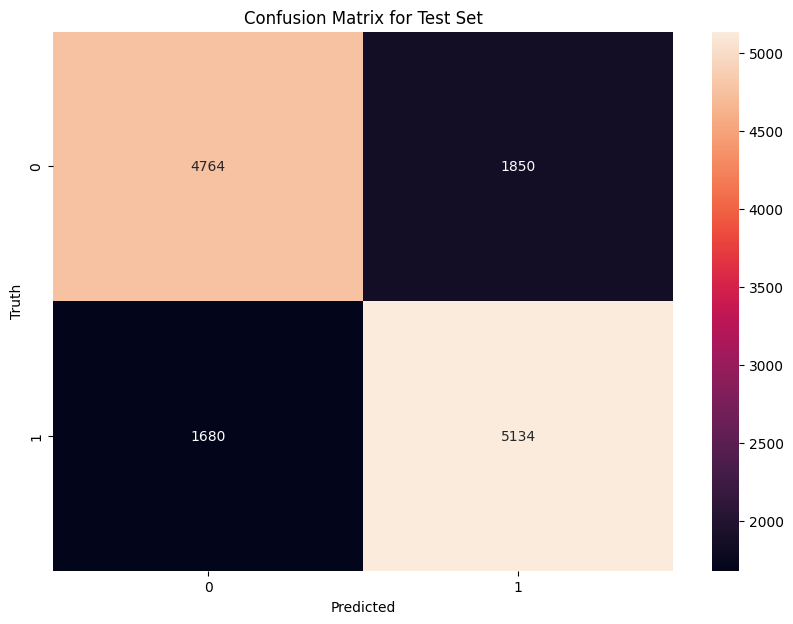

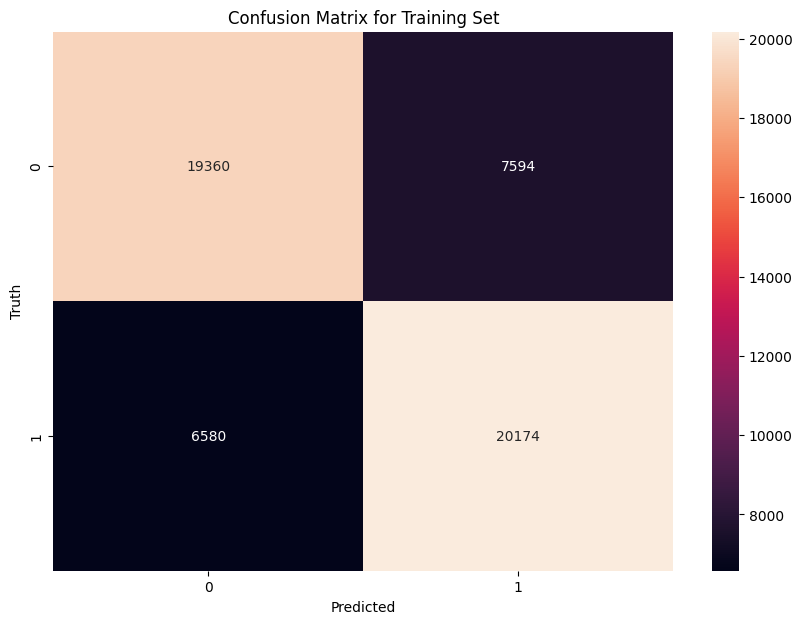

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate the confusion matrix
cmTest = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cmTest, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add a title
plt.title('Confusion Matrix for Test Set')

plt.show()

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Generate the confusion matrix for the training set
cmTrain = confusion_matrix(y_train, y_pred_train)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cmTrain, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add a title
plt.title('Confusion Matrix for Training Set')

plt.show()


Accuracy: 0.7284778075662794


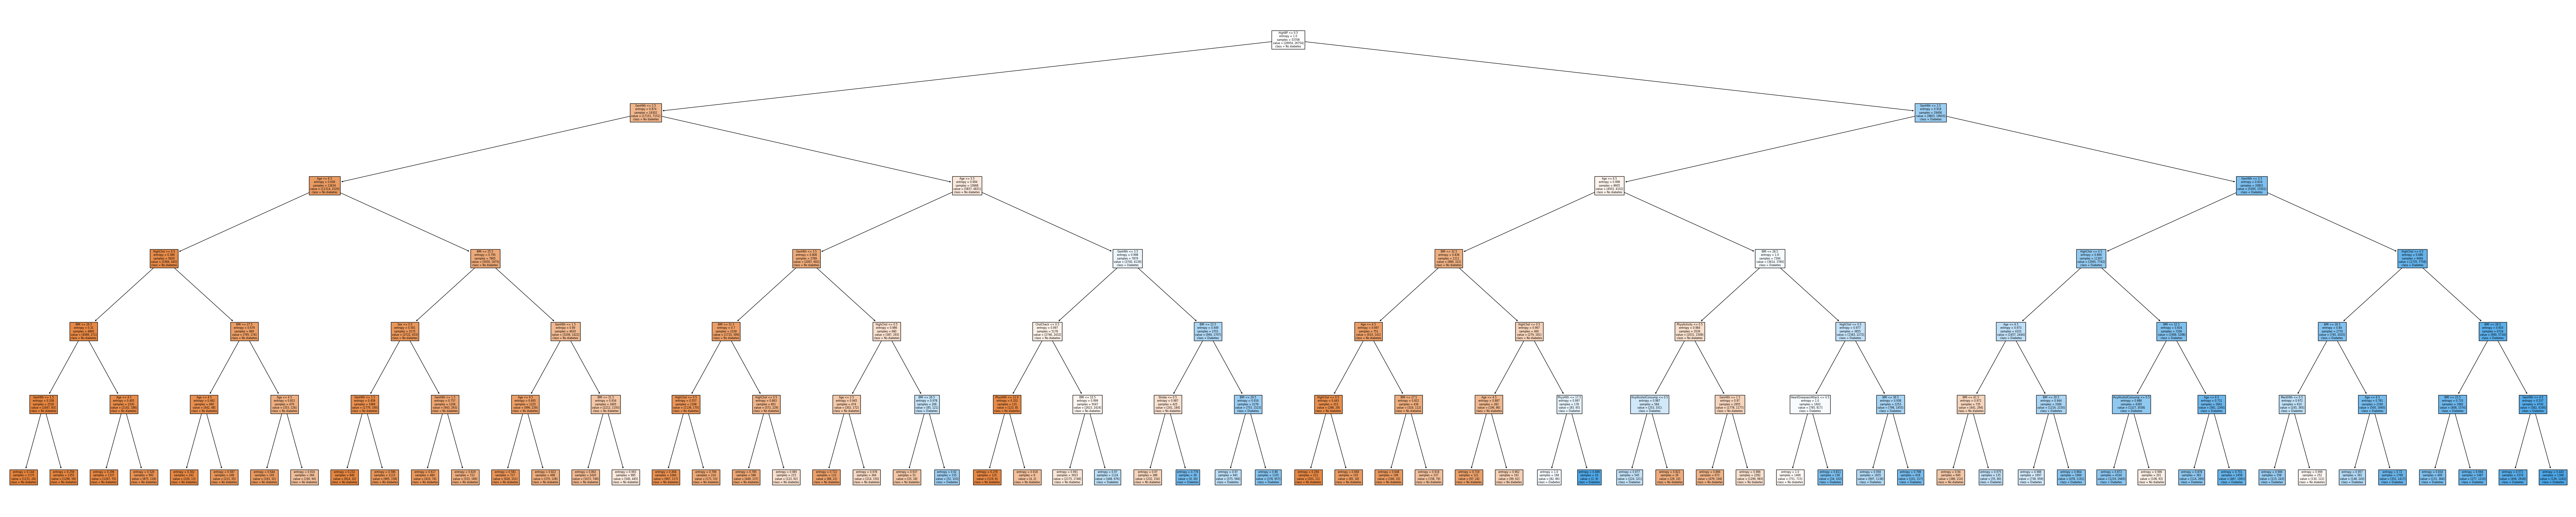

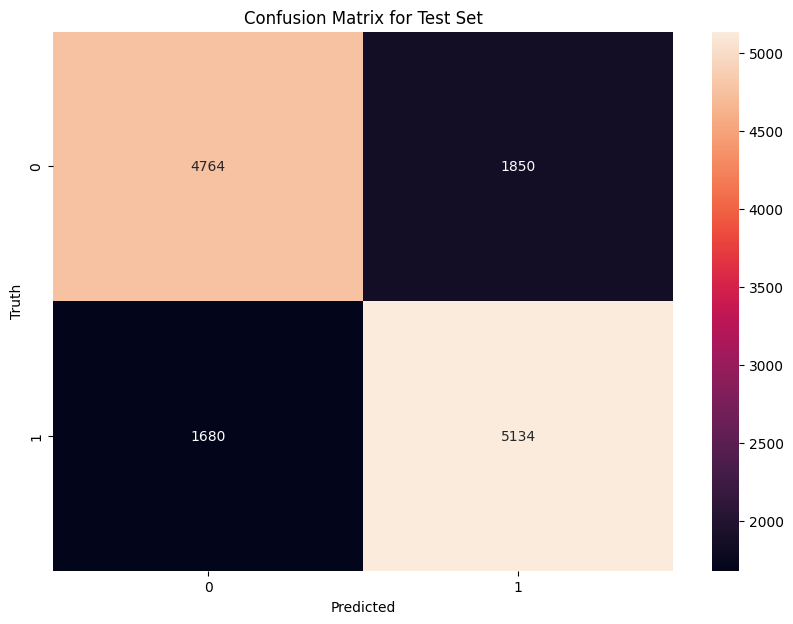

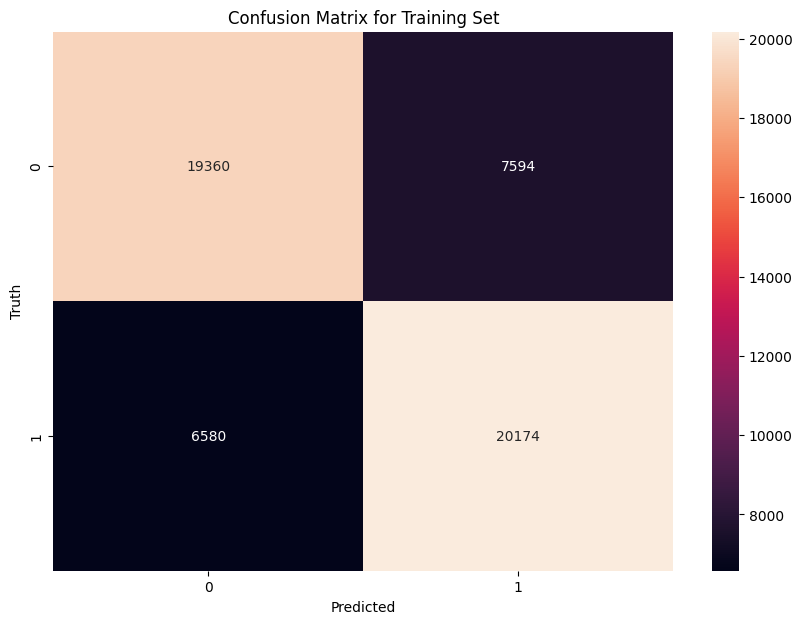

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model2 = DecisionTreeClassifier(random_state=123, criterion="entropy", max_depth=6)
model2.fit(X_train,y_train)
y_pread=model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pread)
print("Accuracy:", accuracy)

feature_names = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 
                 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
                 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 
                 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

class_names = ['No diabetes', 'Diabetes']

plt.figure(figsize=(100, 20))
plot_tree(model2, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()

# Generate the confusion matrix
cmTest = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cmTest, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add a title
plt.title('Confusion Matrix for Test Set')

plt.show()

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Generate the confusion matrix for the training set
cmTrain = confusion_matrix(y_train, y_pred_train)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cmTrain, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add a title
plt.title('Confusion Matrix for Training Set')

plt.show()

Accuracy: 0.6900506404527852


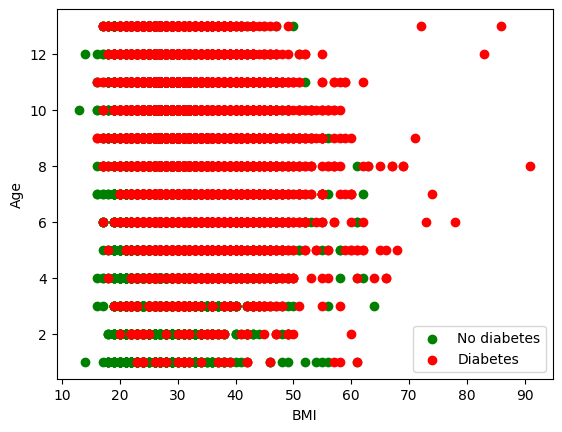

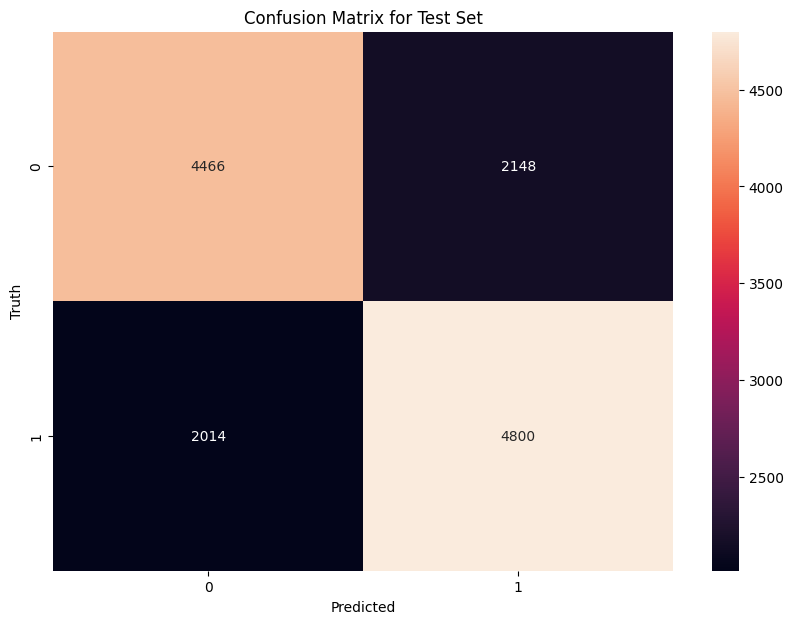

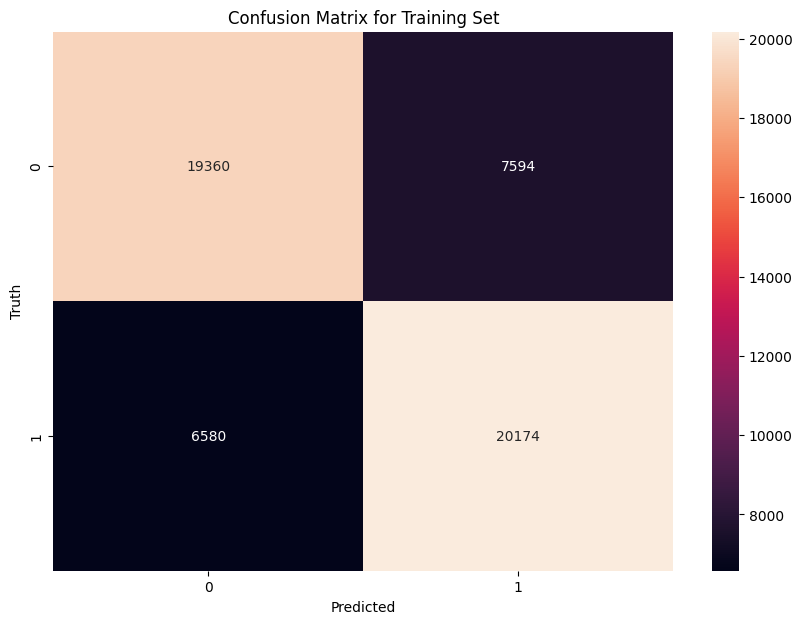

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Train the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Select two features for plotting
feature_1 = X_test['BMI']
feature_2 = X_test['Age']

# Create a color map
colors = ['green', 'red']

# Plot the results
for i, color in enumerate(colors):
    indices = y_test == i
    plt.scatter(feature_1[indices], feature_2[indices], c=color)

plt.legend(['No diabetes', 'Diabetes'])
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()

# Generate the confusion matrix
cmTest = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cmTest, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add a title
plt.title('Confusion Matrix for Test Set')

plt.show()

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Generate the confusion matrix for the training set
cmTrain = confusion_matrix(y_train, y_pred_train)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cmTrain, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add a title
plt.title('Confusion Matrix for Training Set')

plt.show()

Accuracy: 0.7212540959189753


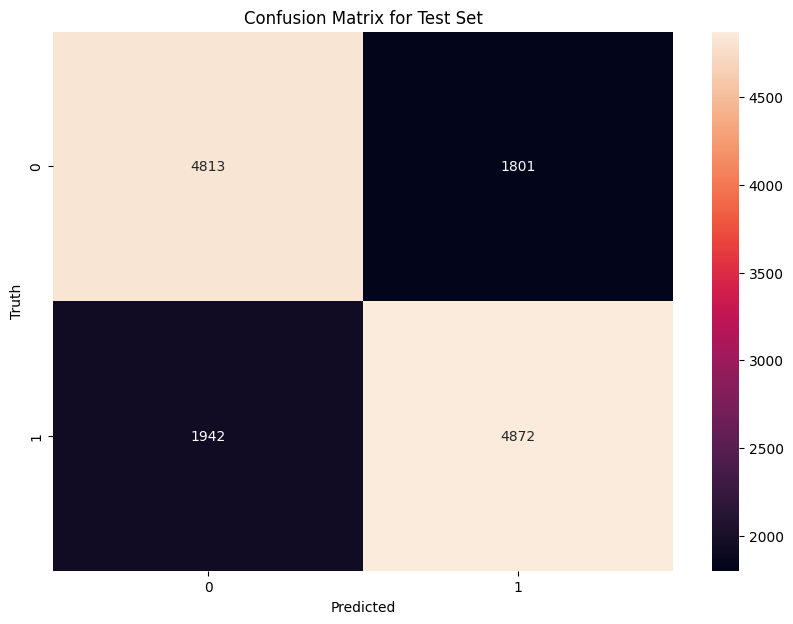

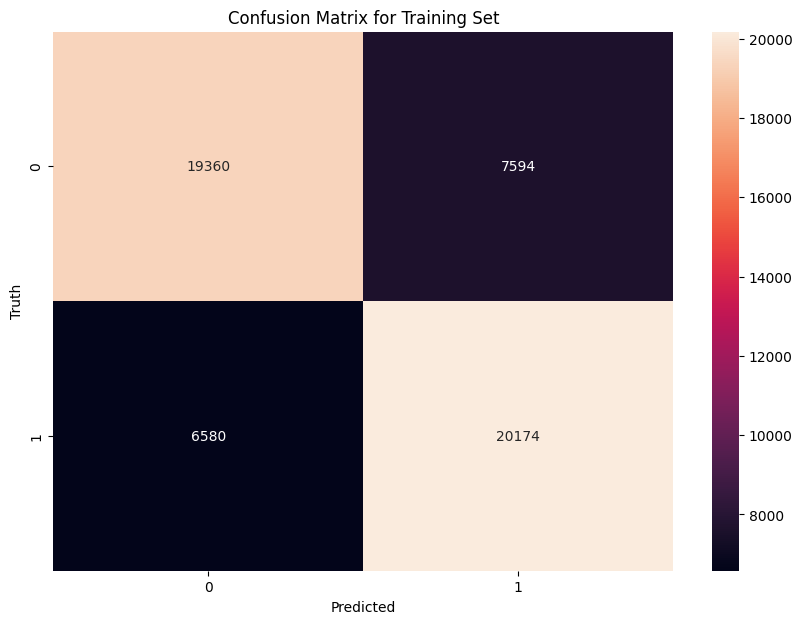

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = gnb.predict(X_test)

# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Generate the confusion matrix
cmTest = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cmTest, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add a title
plt.title('Confusion Matrix for Test Set')

plt.show()

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Generate the confusion matrix for the training set
cmTrain = confusion_matrix(y_train, y_pred_train)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cmTrain, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add a title
plt.title('Confusion Matrix for Training Set')

plt.show()

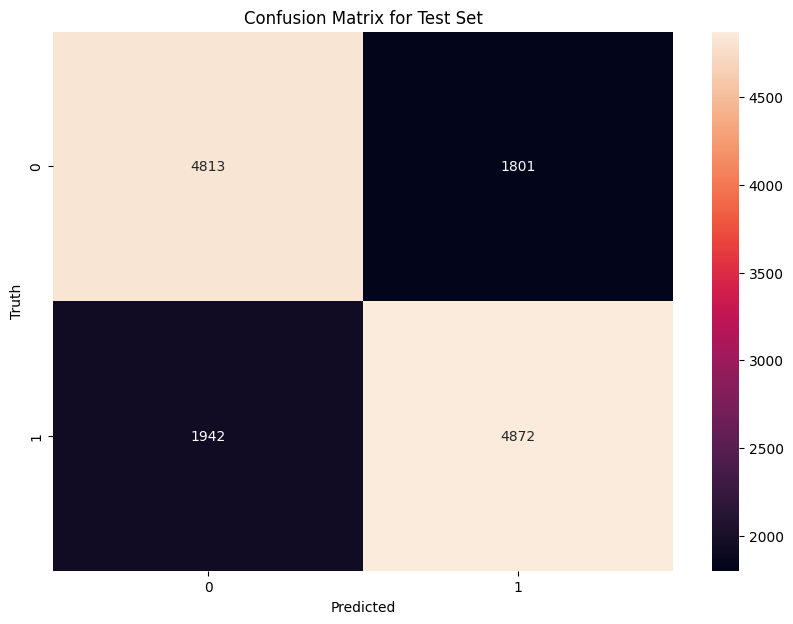

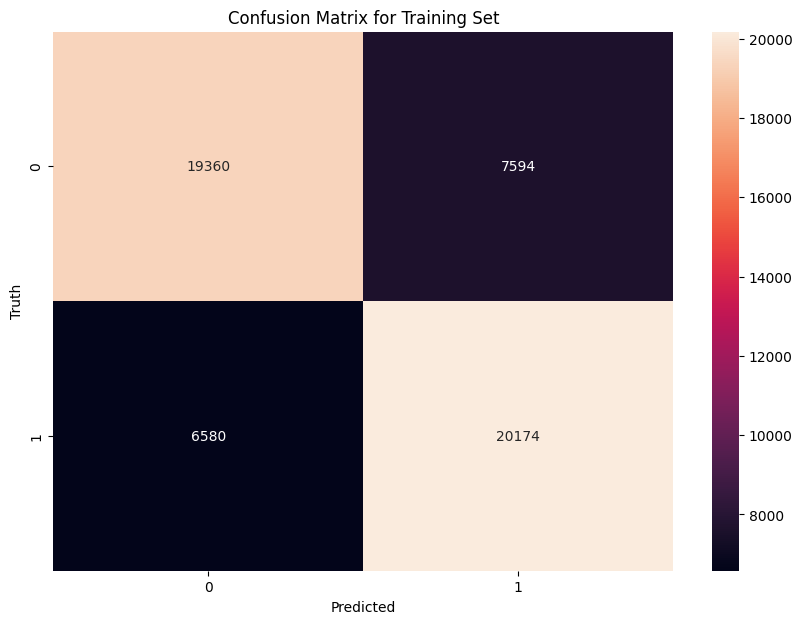

In [21]:
from sklearn.ensemble import RandomForestClassifier as randomForestClassifier
from sklearn.metrics import accuracy_score
rfc=randomForestClassifier()
rfc.fit(X_train,y_train)
rfctd=rfc.predict(X_test)
rfcaccuracy = accuracy_score(y_test, rfctd)
rfcaccuracy

# Generate the confusion matrix
cmTest = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cmTest, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add a title
plt.title('Confusion Matrix for Test Set')

plt.show()

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Generate the confusion matrix for the training set
cmTrain = confusion_matrix(y_train, y_pred_train)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cmTrain, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add a title
plt.title('Confusion Matrix for Training Set')

plt.show()

In [ ]:
import os
import logging
import numpy as np
import pandas as pd
import tensorflow as tf

tf.get_logger().setLevel(logging.ERROR)


class Gan():

    def __init__(self, data):


        self.data = data
        self.n_epochs = 200

    # Genereta random noise in a latent space
    def _noise(self):
        noise = np.random.normal(0, 1, self.data.shape)
        return noise

    def _generator(self):
        model = tf.keras.Sequential(name="Generator_model")
        model.add(tf.keras.layers.Dense(15, activation='relu',
                                        kernel_initializer='he_uniform',
                                        input_dim=self.data.shape[1]))
        model.add(tf.keras.layers.Dense(30, activation='relu'))
        model.add(tf.keras.layers.Dense(
            self.data.shape[1], activation='linear'))
        return model

    def _discriminator(self):
        model = tf.keras.Sequential(name="Discriminator_model")
        model.add(tf.keras.layers.Dense(25, activation='relu',
                                        kernel_initializer='he_uniform',
                                        input_dim=self.data.shape[1]))
        model.add(tf.keras.layers.Dense(50, activation='relu'))
        # sigmoid => real or fake
        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

        return model

    # define the combined generator and discriminator model,
    # for updating the generator
    def _GAN(self, generator, discriminator):
        discriminator.trainable = False
        generator.trainable = True
        model = tf.keras.Sequential(name="GAN")
        model.add(generator)
        model.add(discriminator)
        model.compile(loss='binary_crossentropy', optimizer='adam')
        return model

    # train the generator and discriminator
    def train(self, generator, discriminator, gan):

        # determine half the size of one batch, for updating the  discriminator
        # manually enumerate epochs
        for epoch in range(self.n_epochs):
            
            # Train the discriminator
            generated_data = generator.predict(self._noise())
            labels = np.concatenate([np.ones(self.data.shape[0]), np.zeros(self.data.shape[0])])
            X = np.concatenate([self.data, generated_data])
            discriminator.trainable = True
            d_loss , _ = discriminator.train_on_batch(X, labels)

            # Train the generator
            noise = self._noise()
            g_loss = gan.train_on_batch(noise, np.ones(self.data.shape[0]))


            print('>%d, d1=%.3f, d2=%.3f' %(epoch+1, d_loss, g_loss))

        return generator

In [3]:
model = Gan(data=balanced_df)
generator = model._generator()
descriminator = model._discriminator()
gan_model = model._GAN(generator=generator, discriminator=descriminator)
trained_model = model.train(
    generator=generator, discriminator=descriminator, gan=gan_model)

C:\Users\ensar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2098/2098 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
2098/2098 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
2098/2098 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2098/2098 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2098/2098 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2098/2098 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2098/2098 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2098/2098 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2098/2098 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
2098/2098 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
2098/2098 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2098/2098 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2098/2098 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
2098/2098 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
2098/2098 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2098/2098 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2098/2098 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
2098/2098 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
2098/2098 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2098/2098 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
2098/2098 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
2098/2098 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2098/2098 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
2098/2098 ━

: 

In [ ]:
# noise = np.random.normal(0, 1, data.shape) 
# new_data = _df(data=trained_model.predict(noise))


# Generate new data
def generate_new_data(generator, num_samples):
    noise = np.random.normal(0, 1, (num_samples, 100))
    return generator.predict(noise)

# Use the generator to create 10 new samples
new_data = generate_new_data(generator, 100)

# Convert to DataFrame
df = pd.DataFrame(new_data)

df.head(100)